In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
import matplotlib.pyplot as plt
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


In [7]:
train = pd.read_csv('train.csv')
test=pd.read_csv('test.csv')
train_org = train.copy()
test_org = test.copy()


In [8]:
train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,NaN,9,14,Female,1
1,10000002,"30,000",4 years,Mortgage,NaN,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,NaN,12,16,Male,3
3,10000004,"16,000",< 1 year,NaN,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,NaN,16,22,Male,3
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,NaN,19,30,Female,1


In [9]:
train.Months_Since_Deliquency.describe()

count    75930.000000
mean        34.229356
std         21.761180
min          0.000000
25%         16.000000
50%         31.000000
75%         50.000000
max        180.000000
Name: Months_Since_Deliquency, dtype: float64

In [10]:
train['open_account_percent']=train.Number_Open_Accounts/train.Total_Accounts
test['open_account_percent']=train.Number_Open_Accounts/train.Total_Accounts

In [11]:
def fill_nan(x):
    list=['Length_Employed','Home_Owner','Annual_Income','Months_Since_Deliquency']
    for i in list:
        x[str(i)].fillna(method='ffill',inplace=True)

In [12]:
fill_nan(test)

In [13]:
test.isna().sum()

Loan_ID                    0
Loan_Amount_Requested      0
Length_Employed            0
Home_Owner                 0
Annual_Income              0
Income_Verified            0
Purpose_Of_Loan            0
Debt_To_Income             0
Inquiries_Last_6Mo         0
Months_Since_Deliquency    0
Number_Open_Accounts       0
Total_Accounts             0
Gender                     0
open_account_percent       0
dtype: int64

In [14]:
train['Loan_Amount_edited'] = train.Loan_Amount_Requested.apply(lambda x : x.replace(',',''))  
train['Loan_Amount_edited'] = train.Loan_Amount_edited.astype('int64')  #changin Loan_Amount type to numeric type
test['Loan_Amount_edited'] = train.Loan_Amount_Requested.apply(lambda x : x.replace(',',''))  
test['Loan_Amount_edited'] = train.Loan_Amount_edited.astype('int64')

In [15]:
train.isna().sum()

Loan_ID                        0
Loan_Amount_Requested          0
Length_Employed             7371
Home_Owner                 25349
Annual_Income              25102
Income_Verified                0
Purpose_Of_Loan                0
Debt_To_Income                 0
Inquiries_Last_6Mo             0
Months_Since_Deliquency    88379
Number_Open_Accounts           0
Total_Accounts                 0
Gender                         0
Interest_Rate                  0
open_account_percent           0
Loan_Amount_edited             0
dtype: int64

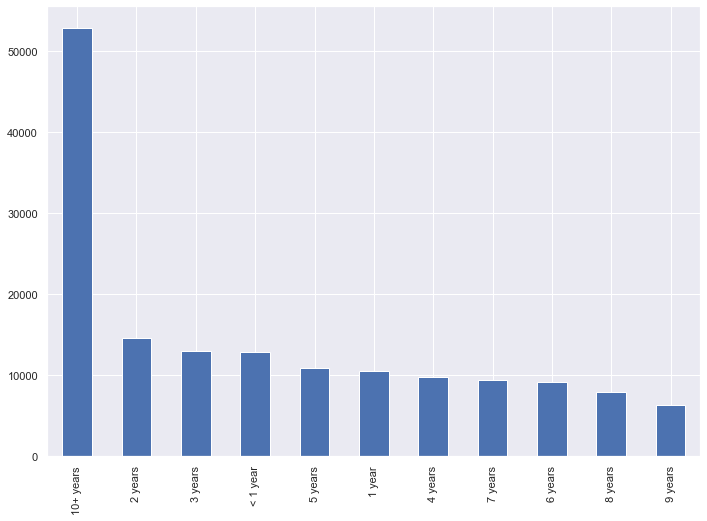

In [16]:
train.Length_Employed.value_counts().plot(kind ='bar')

In [17]:
train.Length_Employed.fillna(method='ffill',inplace=True)

In [18]:
train.Home_Owner.fillna(method='ffill',inplace=True)

In [19]:
train.Annual_Income.fillna(method='ffill',inplace=True)

In [85]:
train['Annual_Income_log'] = np.log(train.Annual_Income)
test['Annual_Income_log'] = np.log(test.Annual_Income)

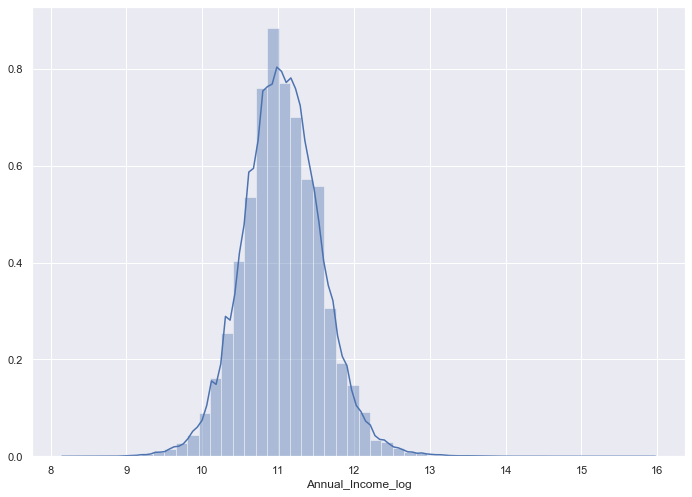

In [86]:
sns.distplot(train.Annual_Income_log)

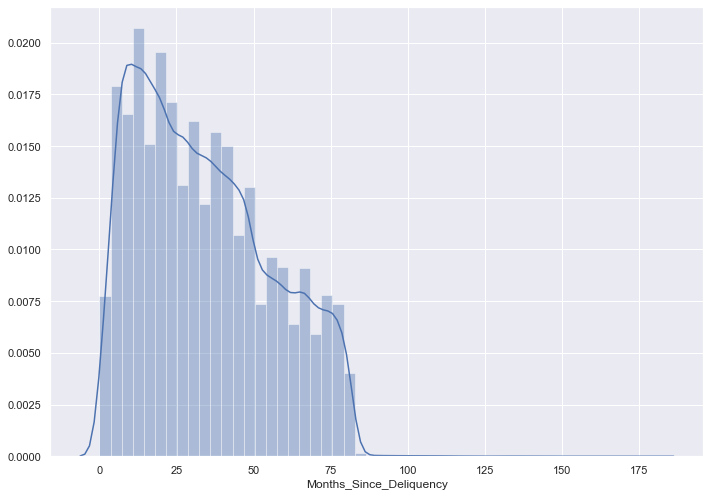

In [87]:
sns.distplot(train.Months_Since_Deliquency)

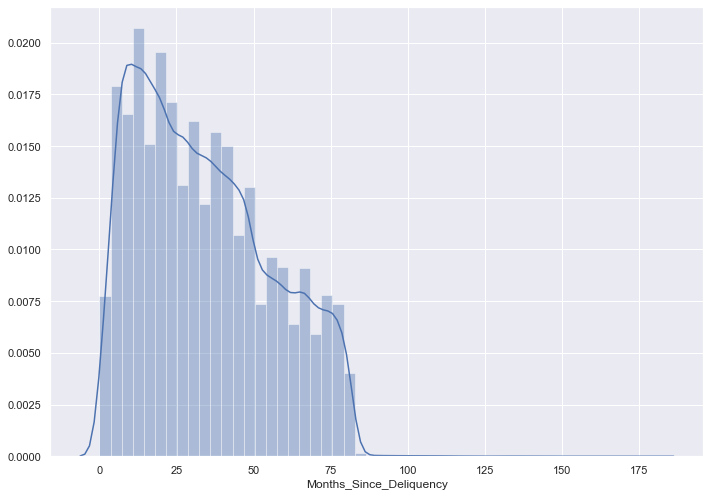

In [88]:
train.Months_Since_Deliquency.fillna(method='bfill',inplace = True)
sns.distplot(train.Months_Since_Deliquency)

In [89]:
train.isna().sum()

Loan_ID                      0
Loan_Amount_Requested        0
Length_Employed              0
Home_Owner                   0
Annual_Income                0
Income_Verified              0
Purpose_Of_Loan              0
Debt_To_Income               0
Inquiries_Last_6Mo           0
Months_Since_Deliquency      1
Number_Open_Accounts         0
Total_Accounts               0
Gender                       0
Interest_Rate                0
open_account_percent         0
Loan_Amount_edited           0
Annual_Income_log            0
Loan_Amount_bin              0
Mounth                     671
dtype: int64

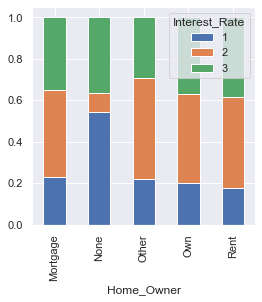

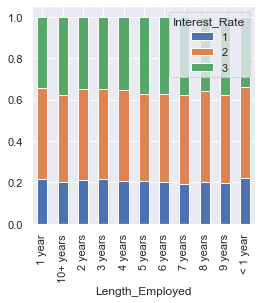

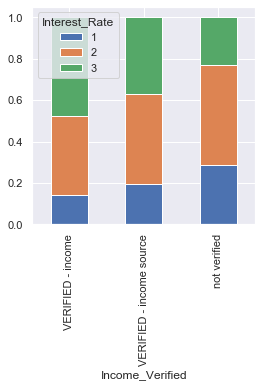

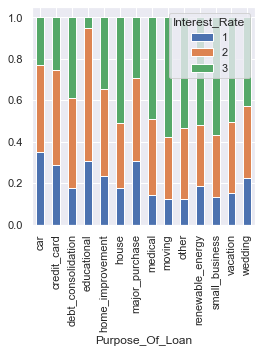

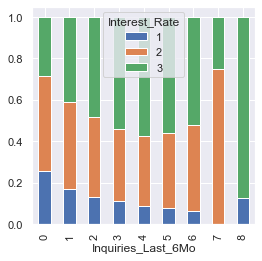

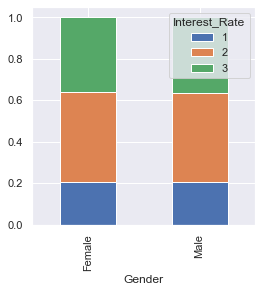

In [90]:
def draw_dependent_interestrate(x):
    X=pd.crosstab(x,train.Interest_Rate)
    X.div(X.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True,figsize=(4,4))
list = ['Home_Owner','Length_Employed','Income_Verified','Purpose_Of_Loan','Inquiries_Last_6Mo','Gender']
for name in list:
    draw_dependent_interestrate(train[str(name)])

In [91]:
train.Loan_Amount_edited.describe()

count    164309.00000
mean      14349.33692
std        8281.86870
min         500.00000
25%        8000.00000
50%       12075.00000
75%       20000.00000
max       35000.00000
Name: Loan_Amount_edited, dtype: float64

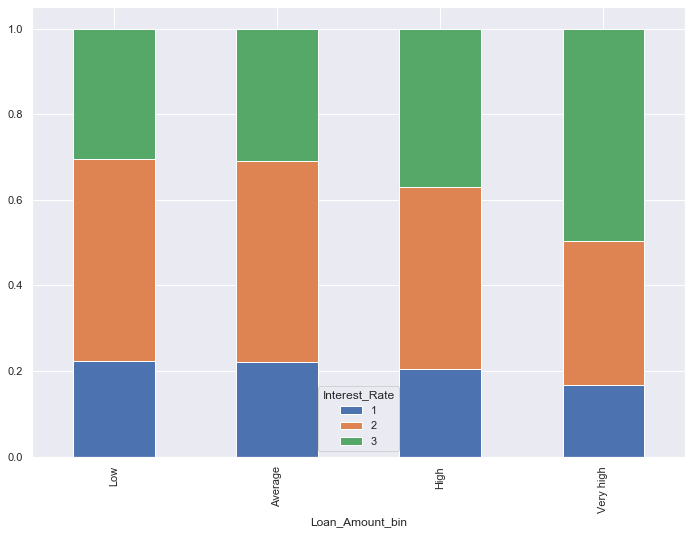

In [92]:
bins=[0,8000,12075,20000,35000] 
group=['Low','Average','High', 'Very high'] 
train['Loan_Amount_bin']=pd.cut(train['Loan_Amount_edited'],bins,labels=group)
Income_bin=pd.crosstab(train['Loan_Amount_bin'],train['Interest_Rate']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 


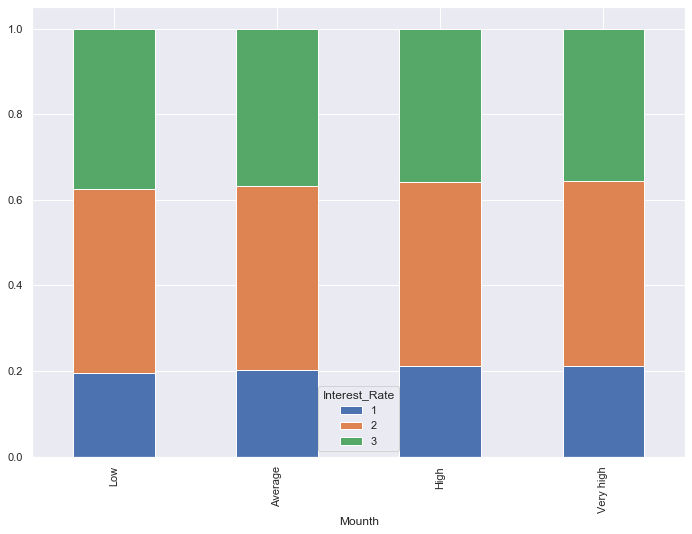

In [93]:
bins=[0,16,31,50,180] 
group=['Low','Average','High', 'Very high'] 
train['Mounth']=pd.cut(train['Months_Since_Deliquency'],bins,labels=group)
Income_bin=pd.crosstab(train['Mounth'],train['Interest_Rate']) 
Income_bin.div(Income_bin.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 

In [94]:
bins=[0,16,31,50,180] 
group=['Low','Average','High', 'Very high'] 
test['Mounth']=pd.cut(test['Months_Since_Deliquency'],bins,labels=group)

In [95]:
bins=[0,8000,12075,20000,35000] 
group=['Low','Average','High', 'Very high'] 
test['Loan_Amount_bin']=pd.cut(test['Loan_Amount_edited'],bins,labels=group)

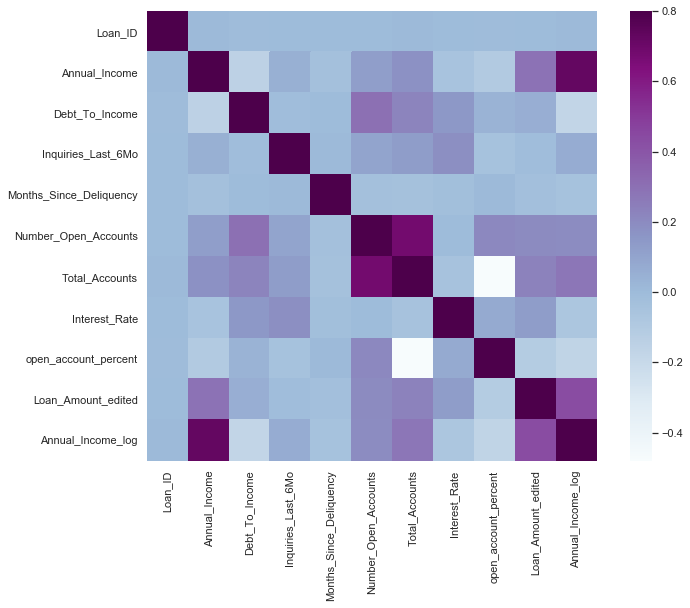

In [96]:
matrix = train.corr() 

sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

In [97]:
train.head()

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,Interest_Rate,open_account_percent,Loan_Amount_edited,Annual_Income_log,Loan_Amount_bin,Mounth
0,10000001,"7,000",< 1 year,Rent,68000.0,not verified,car,18.37,0,17.0,9,14,Female,1,0.642857,7000,11.127263,Low,Average
1,10000002,"30,000",4 years,Mortgage,68000.0,VERIFIED - income,debt_consolidation,14.93,0,17.0,12,24,Female,3,0.500000,30000,11.127263,Very high,Average
2,10000003,"24,725",7 years,Mortgage,75566.4,VERIFIED - income source,debt_consolidation,15.88,0,16.0,12,16,Male,3,0.750000,24725,11.232767,Very high,Low
3,10000004,"16,000",< 1 year,Mortgage,56160.0,VERIFIED - income source,debt_consolidation,14.34,3,16.0,16,22,Male,3,0.727273,16000,10.935960,High,Low
4,10000005,"17,000",8 years,Own,96000.0,VERIFIED - income source,debt_consolidation,22.17,1,16.0,19,30,Female,1,0.633333,17000,11.472103,High,Low


In [98]:
X=train.drop(['Loan_ID','Loan_Amount_Requested','Annual_Income','Number_Open_Accounts','Total_Accounts',
              'Gender','Interest_Rate','Months_Since_Deliquency'],axis=1)

In [99]:
test

,Loan_ID,Loan_Amount_Requested,Length_Employed,Home_Owner,Annual_Income,Income_Verified,Purpose_Of_Loan,Debt_To_Income,Inquiries_Last_6Mo,Months_Since_Deliquency,Number_Open_Accounts,Total_Accounts,Gender,open_account_percent,Loan_Amount_edited,Mounth,Loan_Amount_bin,Annual_Income_log
0,10164310,"27,500",10+ years,Mortgage,129000.0,VERIFIED - income,debt_consolidation,12.87,0,68.0,10,37,Male,0.642857,7000,Very high,Low,11.767568
1,10164311,"26,000",10+ years,Mortgage,110000.0,not verified,credit_card,11.37,0,68.0,6,23,Male,0.500000,30000,Very high,Very high,11.608236
2,10164312,"6,075",< 1 year,Rent,75000.0,VERIFIED - income,debt_consolidation,6.83,2,68.0,5,20,Male,0.750000,24725,Very high,Very high,11.225243
3,10164313,"12,000",10+ years,Mortgage,73000.0,VERIFIED - income source,debt_consolidation,7.76,0,68.0,6,8,Male,0.727273,16000,Very high,High,11.198215
4,10164314,"35,000",< 1 year,Mortgage,156000.0,not verified,debt_consolidation,9.62,0,26.0,9,21,Male,0.633333,17000,Average,High,11.957611
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
109536,10273846,"15,000",9 years,Mortgage,120000.0,VERIFIED - income,other,8.15,2,32.0,13,57,Male,0.588235,8000,High,Low,11.695247
109537,10273847,"9,600",10+ years,Mortgage,125000.0,not verified,credit_card,9.08,1,17.0,9,34,Male,0.304348,21200,Average,Very high,11.736069
109538,10273848,"2,000",5 years,Rent,37850.0,not verified,credit_card,11.60,0,17.0,10,11,Male,0.562500,16000,Average,High,10.541386
109539,10273849,"2,125",6 years,Rent,30000.0,not verified,other,24.88,0,17.0,5,6,Male,0.541667,14000,Average,High,10.308953


In [100]:
Xtest=test.drop(['Loan_ID','Loan_Amount_Requested','Annual_Income','Number_Open_Accounts','Total_Accounts',
              'Gender','Months_Since_Deliquency'],axis=1)

In [101]:
X =pd.get_dummies(X)
Xtest = pd.get_dummies(Xtest)

In [102]:
X = X.drop(['Purpose_Of_Loan_moving','Loan_Amount_bin_Low','Length_Employed_1 year','Mounth_Low'],axis=1)

In [117]:
len(X.columns)

42

In [104]:
Xtest =Xtest.drop(['Purpose_Of_Loan_moving','Loan_Amount_bin_Low','Length_Employed_1 year','Mounth_Low'],axis=1)

In [118]:
len(Xtest.columns)

42

In [119]:
y = train.Interest_Rate

In [120]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import r2_score,accuracy_score,f1_score
from sklearn.model_selection import train_test_split

In [121]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state =1,test_size=0.2)


In [122]:
knn = KNeighborsClassifier().fit(X_train,y_train)

In [110]:
knn_pred = knn.predict(X_test)

In [111]:
f1_score(y_test,knn_pred,average='weighted')

0.4427531110792302

In [112]:
accuracy_score(knn_pred,y_test)

0.4422737508368328

In [113]:
clf =DecisionTreeClassifier(random_state=0)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')

In [114]:
clf_pred = clf.predict(X_test)

In [115]:
accuracy_score(clf_pred,y_test)

0.420881261030978

In [116]:
f1_score(y_test,clf_pred,average='weighted')

0.42146159849698434

In [130]:
submission_pred = clf.predict(Xtest)

In [131]:
test['Interest_Rate'] = submission_pred

In [132]:
test[['Loan_ID','Interest_Rate']].set_index('Loan_ID').to_csv('Submissionclf.csv')  